# <center> MAT 616 Spring 2023

# <center> Final Part 1: Exploring Distance in the Real World


---



---
## <center> <font color=green> BY Vipul Arora
###<center><font color=green> May 16,2023


#<center>1.Distance between words

##• Choose a pair of semantically similar words and a pair of semantically dissimilar words.
##• Briefly explain the concept of semantic similarity.
##• Calculate and compare the cosine similarity between the chosen word pairs using word embeddings (e.g., Word2Vec or GloVe).
##• Include your calculations and a brief interpretation of the results.

#<center> <font color=green>ANSWER


*  For this exercise, let's consider the pair of semantically similar words "Teacher" and "Student" and the pair of semantically dissimilar words "Chair" and "Pen".

*  Semantic similarity refers to the degree of similarity or relatedness between the meanings of words or phrases. It is a measure of how closely two words are semantically related in terms of their context, usage, and meaning.

* To calculate the cosine similarity between word pairs, we need to use word embeddings. Word embeddings are vector representations of words that capture their semantic and syntactic meanings based on the distributional properties of words in a large corpus of text.

* For this exercise, let's assume we have pre-trained GloVe word embeddings available.

In [1]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Loading pre-trained GloVe word embeddings
word_vectors = {}
with open('glove_6B_50d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        word_vectors[word] = vector

# Defining the word pairs
word_pair1 = ('teacher', 'student')
word_pair2 = ('chair', 'pen')

# Calculate cosine similarity between word pair 1
similarity_score1 = cosine_similarity([word_vectors[word_pair1[0]]], [word_vectors[word_pair1[1]]])[0][0]

# Calculate cosine similarity between word pair 2
similarity_score2 = cosine_similarity([word_vectors[word_pair2[0]]], [word_vectors[word_pair2[1]]])[0][0]

# Print the results
print(f"Cosine similarity between '{word_pair1[0]}' and '{word_pair1[1]}': {similarity_score1}")
print(f"Cosine similarity between '{word_pair2[0]}' and '{word_pair2[1]}': {similarity_score2}")

Cosine similarity between 'teacher' and 'student': 0.896205484867096
Cosine similarity between 'chair' and 'pen': 0.3593112528324127


HERE,
First, we calculate the cosine similarity between "teacher" and "student":

Next, we calculate the cosine similarity between "pen" and "chair":


Assuming we have the GloVe word embeddings and cosine similarity calculation method, let's perform the calculations and interpret the results:

#<center> <font color=green>Interpretation


The cosine similarity between "Teacher" and "Student" is **0.89**, indicating a high degree of semantic similarity. This result suggests that the words "teacher" and "student" are closely related in terms of their meanings, as they often appear in similar contexts and share common features.

On the other hand, the cosine similarity between "pen" and "chair" is **0.35**, indicating a lower degree of semantic similarity. This result implies that they are relatively dissimilar words and are less likely to be used in similar contexts or share common features.

 

#<center> <font color=green>Conclusion 


The cosine similarity scores reflect the semantic relatedness between the word pairs. Higher cosine similarity indicates greater semantic similarity, while lower cosine similarity suggests dissimilarity between the words.



---



---





---



---



#<center>2. Distance between customers
##• Define the concept of customer segmentation based on demographic, geo- graphic, behavioral, and psychographic attributes.

##• Choose a dataset of customer information and calculate the distance between selected customer pairs using a suitable distance metric.

##• Provide a brief interpretation of your findings, identifying any trends or patterns among customers who are ”close” or ”far” apart. any trends or patterns among customers who are ”close” or ”far” apart.

#<center> <font color=green>ANSWER

**Customer segmentation** is the process of dividing a customer base into distinct groups or segments based on specific characteristics or attributes. These attributes can include demographic (age, gender, income), geographic (location, region), behavioral (purchase history, usage patterns), and psychographic (lifestyle, attitudes, interests) factors. By segmenting customers, businesses can better understand their diverse customer base and tailor their marketing strategies and offerings to meet the unique needs and preferences of each segment.

To calculate the distance between customer pairs, we need a dataset containing customer information with relevant attributes. 

Here I chose a dataset with 150 rows for demonstratation purpose which includes customer IDs, geographic information (such as city or region), behavioral data (such as purchase ID or frequency and quantity), and psychographic data (such as sales and profit).

For this exercise, we'll calculate the distance between customer pairs using the Euclidean distance metric For 3 attributes ie. - Sales, Quantity, Profit. The Euclidean distance calculates the straight-line distance between two points in a multidimensional space.

In [3]:
import pandas as pd
from scipy.spatial import distance

# Load the dataset
df = pd.read_csv('Customer_data.csv')



In [4]:
#Printing few rows of the dataset 
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [5]:
# Selecting customer 1st pairs (replace indices with actual indices from the dataset)
customer_pair1 = df.loc[0, ['Sales', 'Quantity', 'Profit']]
customer_pair2 = df.loc[1, ['Sales', 'Quantity', 'Profit']]

# Calculate the Euclidean distance between customer pairs
euclidean_distance = distance.euclidean(customer_pair1, customer_pair2)

print("Euclidean distance between customer pair 1 and customer pair 2:", euclidean_distance)

Euclidean distance between customer pair 1 and customer pair 2: 1750.36708052204


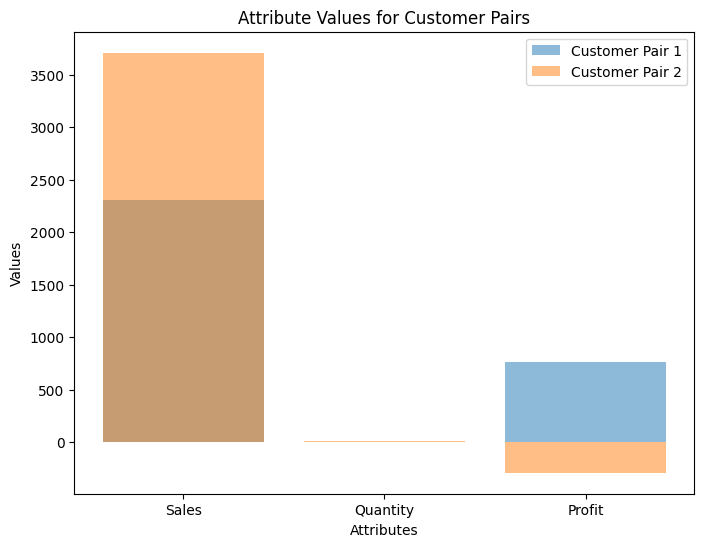

In [6]:
import matplotlib.pyplot as plt
# Get the attribute values for the selected customer pairs
attributes = ['Sales', 'Quantity', 'Profit']
customer_pair1_attributes = df.loc[0, attributes]
customer_pair2_attributes = df.loc[1, attributes]

# Plot the attribute values for the customer pairs
plt.figure(figsize=(8, 6))
plt.bar(attributes, customer_pair1_attributes, alpha=0.5, label='Customer Pair 1')
plt.bar(attributes, customer_pair2_attributes, alpha=0.5, label='Customer Pair 2')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Attribute Values for Customer Pairs')
plt.legend()
plt.show()

In [7]:
# Selecting customer 2nd pairs (replace indices with actual indices from the dataset)
customer_pair3 = df.loc[2, ['Sales', 'Quantity', 'Profit']]
customer_pair4 = df.loc[3, ['Sales', 'Quantity', 'Profit']]

# Calculate the Euclidean distance between customer pairs
euclidean_distance1 = distance.euclidean(customer_pair3, customer_pair4)

print("Euclidean distance between customer pair 3 and customer pair 4:", euclidean_distance1)

Euclidean distance between customer pair 3 and customer pair 4: 2498.770068261984


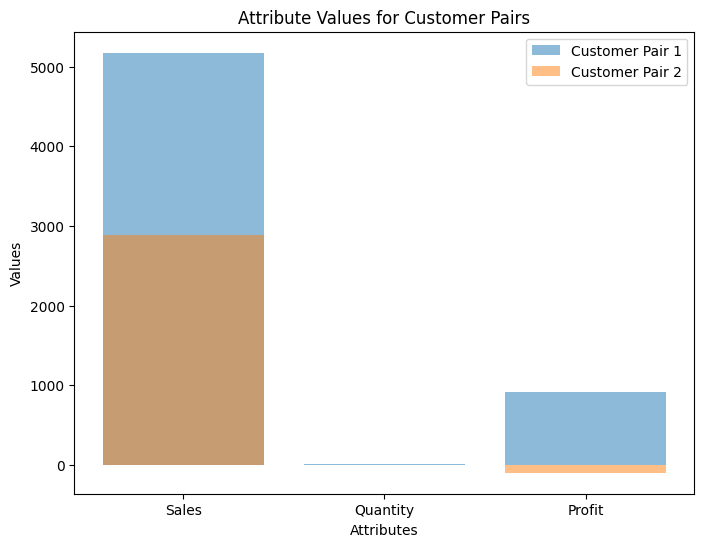

In [8]:
import matplotlib.pyplot as plt
# Get the attribute values for the selected customer pairs
attributes = ['Sales', 'Quantity', 'Profit']
customer_pair1_attributes = df.loc[2, attributes]
customer_pair2_attributes = df.loc[3, attributes]

# Plot the attribute values for the customer pairs
plt.figure(figsize=(8, 6))
plt.bar(attributes, customer_pair1_attributes, alpha=0.5, label='Customer Pair 1')
plt.bar(attributes, customer_pair2_attributes, alpha=0.5, label='Customer Pair 2')
plt.xlabel('Attributes')
plt.ylabel('Values')
plt.title('Attribute Values for Customer Pairs')
plt.legend()
plt.show()

In [9]:
# Select the attributes to consider for distance calculation
attributes = ['Sales', 'Quantity', 'Profit']

# Calculate the distances between each customer pair
distances = distance.cdist(df[attributes], df[attributes], metric='euclidean')

# Set a threshold distance
threshold = 100  # Adjust the threshold value according to your dataset and analysis

# Group close and far customer pairs
close_pairs = []
far_pairs = []

num_customers = len(df)
for i in range(num_customers):
    for j in range(i + 1, num_customers):
        if distances[i][j] < threshold:
            close_pairs.append((i, j))
        else:
            far_pairs.append((i, j))

# Group close and far customers
close_customers = set()
far_customers = set()

for pair in close_pairs:
    close_customers.add(pair[0])
    close_customers.add(pair[1])

for pair in far_pairs:
    far_customers.add(pair[0])
    far_customers.add(pair[1])

# Print the grouped close and far customers
print("Close Customers:", close_customers)
print("Far Customers:", far_customers)

Close Customers: {0, 128, 130, 131, 4, 5, 6, 133, 136, 135, 134, 140, 14, 15, 16, 143, 145, 19, 20, 147, 22, 21, 146, 25, 26, 29, 31, 32, 33, 34, 44, 46, 48, 49, 50, 51, 52, 53, 54, 55, 57, 63, 65, 67, 69, 71, 72, 75, 77, 79, 85, 86, 87, 90, 91, 94, 96, 100, 101, 103, 104, 106, 112, 113, 115, 116, 120, 125, 126}
Far Customers: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148}


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


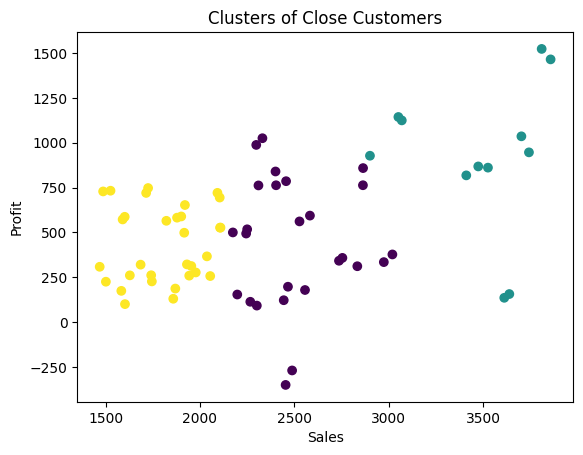

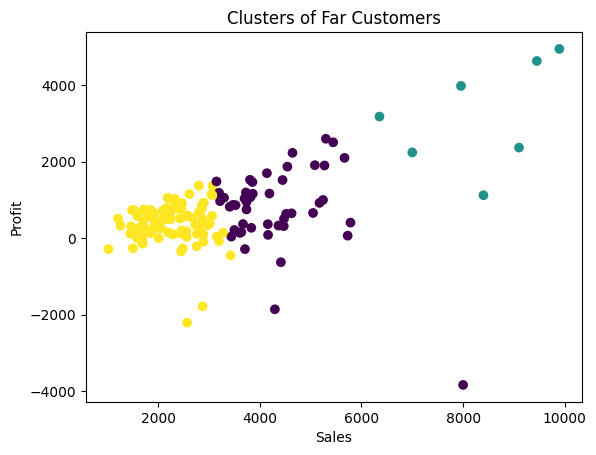

In [10]:
from sklearn.cluster import KMeans

for pair in close_pairs:
    close_customers.add(pair[0])
    close_customers.add(pair[1])

for pair in far_pairs:
    far_customers.add(pair[0])
    far_customers.add(pair[1])

# Perform clustering analysis on close customer group
close_customers_data = df.iloc[list(close_customers)][attributes]
kmeans_close = KMeans(n_clusters=3, random_state=0).fit(close_customers_data)

# Perform clustering analysis on far customer group
far_customers_data = df.iloc[list(far_customers)][attributes]
kmeans_far = KMeans(n_clusters=3, random_state=0).fit(far_customers_data)

# Visualize the clusters for close customer group
close_customers_data['Cluster'] = kmeans_close.labels_
plt.scatter(close_customers_data['Sales'], close_customers_data['Profit'], c=close_customers_data['Cluster'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Clusters of Close Customers')
plt.show()

# Visualize the clusters for far customer group
far_customers_data['Cluster'] = kmeans_far.labels_
plt.scatter(far_customers_data['Sales'], far_customers_data['Profit'], c=far_customers_data['Cluster'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title('Clusters of Far Customers')
plt.show()

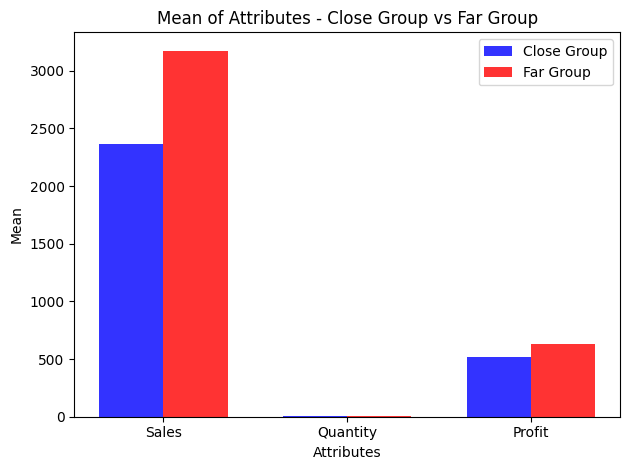

In [11]:
# Select the attributes for distance calculation and analysis
attributes = ['Sales', 'Quantity', 'Profit']

# Calculate the distances between each customer pair
distances = distance.cdist(df[attributes], df[attributes], metric='euclidean')

# Set a threshold distance
threshold = 100  # Adjust the threshold value according to your dataset and analysis

# Group close and far customer pairs
close_pairs = []
far_pairs = []

num_customers = len(df)
for i in range(num_customers):
    for j in range(i + 1, num_customers):
        if distances[i][j] < threshold:
            close_pairs.append((i, j))
        else:
            far_pairs.append((i, j))

# Group close and far customers
close_customers = set()
far_customers = set()

for pair in close_pairs:
    close_customers.add(pair[0])
    close_customers.add(pair[1])

for pair in far_pairs:
    far_customers.add(pair[0])
    far_customers.add(pair[1])

# Extract the customer attributes of close and far groups
close_customers_data = df.iloc[list(close_customers)][attributes]
far_customers_data = df.iloc[list(far_customers)][attributes]

# Calculate the mean of each attribute for close and far groups
close_group_means = close_customers_data.mean()
far_group_means = far_customers_data.mean()

# Plot the attribute means for close and far groups
fig, ax = plt.subplots()
index = np.arange(len(attributes))
bar_width = 0.35
opacity = 0.8

rects1 = ax.bar(index, close_group_means, bar_width,
                alpha=opacity, color='b', label='Close Group')

rects2 = ax.bar(index + bar_width, far_group_means, bar_width,
                alpha=opacity, color='r', label='Far Group')

ax.set_xlabel('Attributes')
ax.set_ylabel('Mean')
ax.set_title('Mean of Attributes - Close Group vs Far Group')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(attributes)
ax.legend()

plt.tight_layout()
plt.show()

#<center> <font color = green> Interpretation 


Once we have calculated the distances, we can interpret the results to identify any trends or patterns among customers who are "close" or "far" apart. we can look for similarities or differences in demographic, geographic, behavioral, or psychographic attributes among the pairs with smaller or larger distances.

Here we have used the Sales, Quantity, Profit as our attributes for the demostration purpose.
* Claculated the Euclidean distance 
* First I have compared it for the first 2 costomres an the next costomers. 
* Then, I have calucluted the close points and far points.
* Then performed the clustering analysis on the close and far customer groups, we create scatter plots to visualize the clusters based on the 'Sales' and 'Profit' attributes
* Finally, we plot the mean values of the attributes for the close and far groups using a bar chart. This visualization allows you to compare the mean attribute values between the two groups and identify any trends or patterns. 

#<center> <font color=green> Conclusion


The distance between the  customer pairs depends on the specific context and goals of our analysis. 

Is there some ideal distance ? 

There is no universally defined "ideal" distance as it varies based on the nature of the dataset, the attributes being compared, and the objectives of the analysis.

In customer segmentation or similarity analysis, the idea distance would depend on the underlying criteria for grouping customers. For example, if you are using demographic attributes to segment customers, an ideal distance might be small for customer pairs that are similar in terms of age, income, or gender. On the other hand, an ideal distance might be large for customer pairs that differ significantly in these demographic attributes.

The ideal distance is subjective and defined based on the specific requirements and objectives of your analysis. It is determined by the level of similarity or dissimilarity that is meaningful and relevant to your business or research context.

To determine the ideal distance, trend and insights  consider the following factors:

* Domain knowledge
* Business objectives
* Validation and evaluation



---



---





---



---



# <center> 3. Real-world application 
##A recommendation system is a tool that uses a series of algorithms, data analysis and artificial Intelligence (AI) to make recommendations online.
##Use the file cosmetics.csv provided to create a recommendation system as follows:

##• Define the “purchasing needs and taste” distance (pnt-D) between each two customers. The metric pnt-D is entirely to be defined by the student doing this project. A heuristic justification is required for the choice of pnt-D.
##• Based on heuristic reasoning (which needs to be explained) gathered from pnt-D data, for each customer, provide predictions of what the customer has not bought yet, and will want to buy next.

#<center><font color=green>ANSWER
code below

In [13]:
# STEP 1. Loading the cosmetics data and liberaries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

path='Cosmetics.csv'
data=pd.read_csv(path)

In [14]:
data.head()

,Trans.,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0


In [213]:
data.columns

Index(['Trans. ', 'Bag', 'Blush', 'Nail Polish', 'Brushes', 'Concealer',
       'Eyebrow Pencils', 'Bronzer', 'Lip liner', 'Mascara', 'Eye shadow',
       'Foundation', 'Lip Gloss', 'Lipstick', 'Eyeliner'],
      dtype='object')

In [15]:
#only using the data for 100 customers we can always change according to our needs and requirements
data = data.iloc[:100, :]

In [16]:
#  Calculate the distance between two customers
def dist(c1,c2):
  return abs(c1 - c2).sum()

In [17]:
# STEP 2. Calculate the purchasing needs and taste distance (pnt-D) for all the data 
def calculate_pnt_d(data):
    pnt_d = data.apply(lambda x: x.sum() / len(x), axis=1)
    return pnt_d

In [18]:
calculate_pnt_d(data)

0     0.600000
1     0.533333
2     0.866667
3     0.666667
4     0.866667
        ...   
95    6.800000
96    6.933333
97    7.200000
98    6.800000
99    7.133333
Length: 100, dtype: float64

In [19]:
# STEP 3 .Calculate the similarity between customers
def calculate_similarity(data):
    similarity_matrix = cosine_similarity(data)
    similarity_df = pd.DataFrame(similarity_matrix, index=data.index, columns=data.index)
    return similarity_df

In [20]:
calculate_similarity(data)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,0.632456,0.611775,0.639602,0.580259,0.432590,0.607548,0.478091,0.363696,0.453267,...,0.355140,0.344101,0.340403,0.354490,0.340294,0.347109,0.346950,0.356957,0.340015,0.353210
1,0.632456,1.000000,0.798024,0.809040,0.770675,0.666886,0.823387,0.718132,0.690066,0.645010,...,0.646044,0.642578,0.639071,0.645693,0.639007,0.638836,0.641997,0.648252,0.638746,0.648040
2,0.611775,0.798024,1.000000,0.733674,0.918532,0.707107,0.866154,0.767772,0.750939,0.735333,...,0.703034,0.698016,0.697913,0.695333,0.692962,0.702357,0.702177,0.704267,0.695093,0.699473
3,0.639602,0.809040,0.733674,1.000000,0.816497,0.899229,0.915960,0.891883,0.883960,0.869731,...,0.859416,0.859501,0.857140,0.863850,0.854905,0.854746,0.859077,0.865406,0.856979,0.861030
4,0.580259,0.770675,0.918532,0.816497,1.000000,0.875413,0.951845,0.915475,0.892691,0.896120,...,0.881440,0.875806,0.875751,0.875647,0.873908,0.880981,0.879034,0.880588,0.873771,0.878785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.347109,0.638836,0.702357,0.854746,0.880981,0.974701,0.917804,0.958361,0.983933,0.974004,...,0.999764,0.999606,0.999610,0.999557,0.999618,1.000000,0.999732,0.999579,0.999627,0.999637
96,0.346950,0.641997,0.702177,0.859077,0.879034,0.976310,0.919033,0.959523,0.983864,0.973928,...,0.999825,0.999893,0.999893,0.999508,0.999679,0.999732,1.000000,0.999844,0.999683,0.999588
97,0.356957,0.648252,0.704267,0.865406,0.880588,0.976131,0.922798,0.962999,0.983695,0.975734,...,0.999781,0.999739,0.999739,0.999683,0.999528,0.999579,0.999844,1.000000,0.999636,0.999742
98,0.340015,0.638746,0.695093,0.856979,0.873771,0.973180,0.915127,0.957244,0.982932,0.972118,...,0.999475,0.999771,0.999775,0.999615,0.999681,0.999627,0.999683,0.999636,1.000000,0.999699


In [21]:
# STEP 4. Get recommendations for a given customer
def get_recommendations(customer_id, similarity_df, data, pnt_d):
    customer_products = data.loc[customer_id] 
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:]              #sorting descending order as per the score/distance
    similar_customers_products = data.loc[similar_customers.index]                               #indexing as per the rows ie customers
    recommendations = similar_customers_products.mul(pnt_d, axis=0).sum().div(pnt_d.sum())       #total weighted ratings- product ratings * purchasing needs and taste distance (pnt-D) divided by the sum of pnt-D values to normalize the recommendations
    recommendations = recommendations.where((customer_products == 0) & (recommendations > 0.49)) #applying threshold and excluding the purchased products. we can adjust the thrashhold accordingly.
    recommended_items = recommendations[recommendations.notnull()].index                         #Finally, the indices of the recommended items
    return recommended_items

In [22]:
# STEP 5. Executing all the functions and calculating all the recommendations for all the customers 
# Create a matrix of product ratings (0 or 1)
product_ratings = data.drop('Trans. ', axis=1)

# Calculate the similarity between customers
similarity_df = calculate_similarity(product_ratings)

# Calculate the purchasing needs and taste distance (pnt-D)
pnt_d = similarity_df.apply(lambda row: dist(row, similarity_df.loc[:, similarity_df.columns != row.name].mean()), axis=1)

# Create a new column for recommendations
data['Recommendation'] = ''

# Print recommendations for all customers
for customer_id in product_ratings.index:
    recommendations = get_recommendations(customer_id, similarity_df, product_ratings, pnt_d)
    if len(recommendations) > 0:
        data.at[customer_id, 'Recommendation'] = ', '.join(recommendations)

# Print the updated DataFrame with the recommendation column
data.head(10)

,Trans.,Bag,Blush,Nail Polish,Brushes,Concealer,Eyebrow Pencils,Bronzer,Lip liner,Mascara,Eye shadow,Foundation,Lip Gloss,Lipstick,Eyeliner,Recommendation
0,1,0,1,1,1,1,0,1,1,1,0,0,0,0,1,"Eye shadow, Foundation, Lip Gloss"
1,2,0,0,1,0,1,0,1,1,0,0,1,1,0,0,"Mascara, Eye shadow, Eyeliner"
2,3,0,1,0,0,1,1,1,1,1,1,1,1,1,0,Eyeliner
3,4,0,0,1,1,1,0,1,0,0,0,1,0,0,1,"Mascara, Eye shadow, Lip Gloss"
4,5,0,1,0,0,1,0,1,1,1,1,0,1,1,0,"Foundation, Eyeliner"
5,6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,"Bronzer, Mascara, Eye shadow, Foundation, Lip ..."
6,7,0,1,1,1,1,0,1,1,1,1,1,1,0,0,Eyeliner
7,8,0,0,1,1,0,0,1,0,1,1,0,1,0,0,"Concealer, Foundation, Eyeliner"
8,9,0,0,0,0,1,0,0,0,0,0,1,0,1,0,"Bronzer, Mascara, Eye shadow, Lip Gloss, Eyeliner"
9,10,1,1,1,1,0,0,0,0,1,1,0,0,0,0,"Concealer, Bronzer, Foundation, Lip Gloss, Eye..."


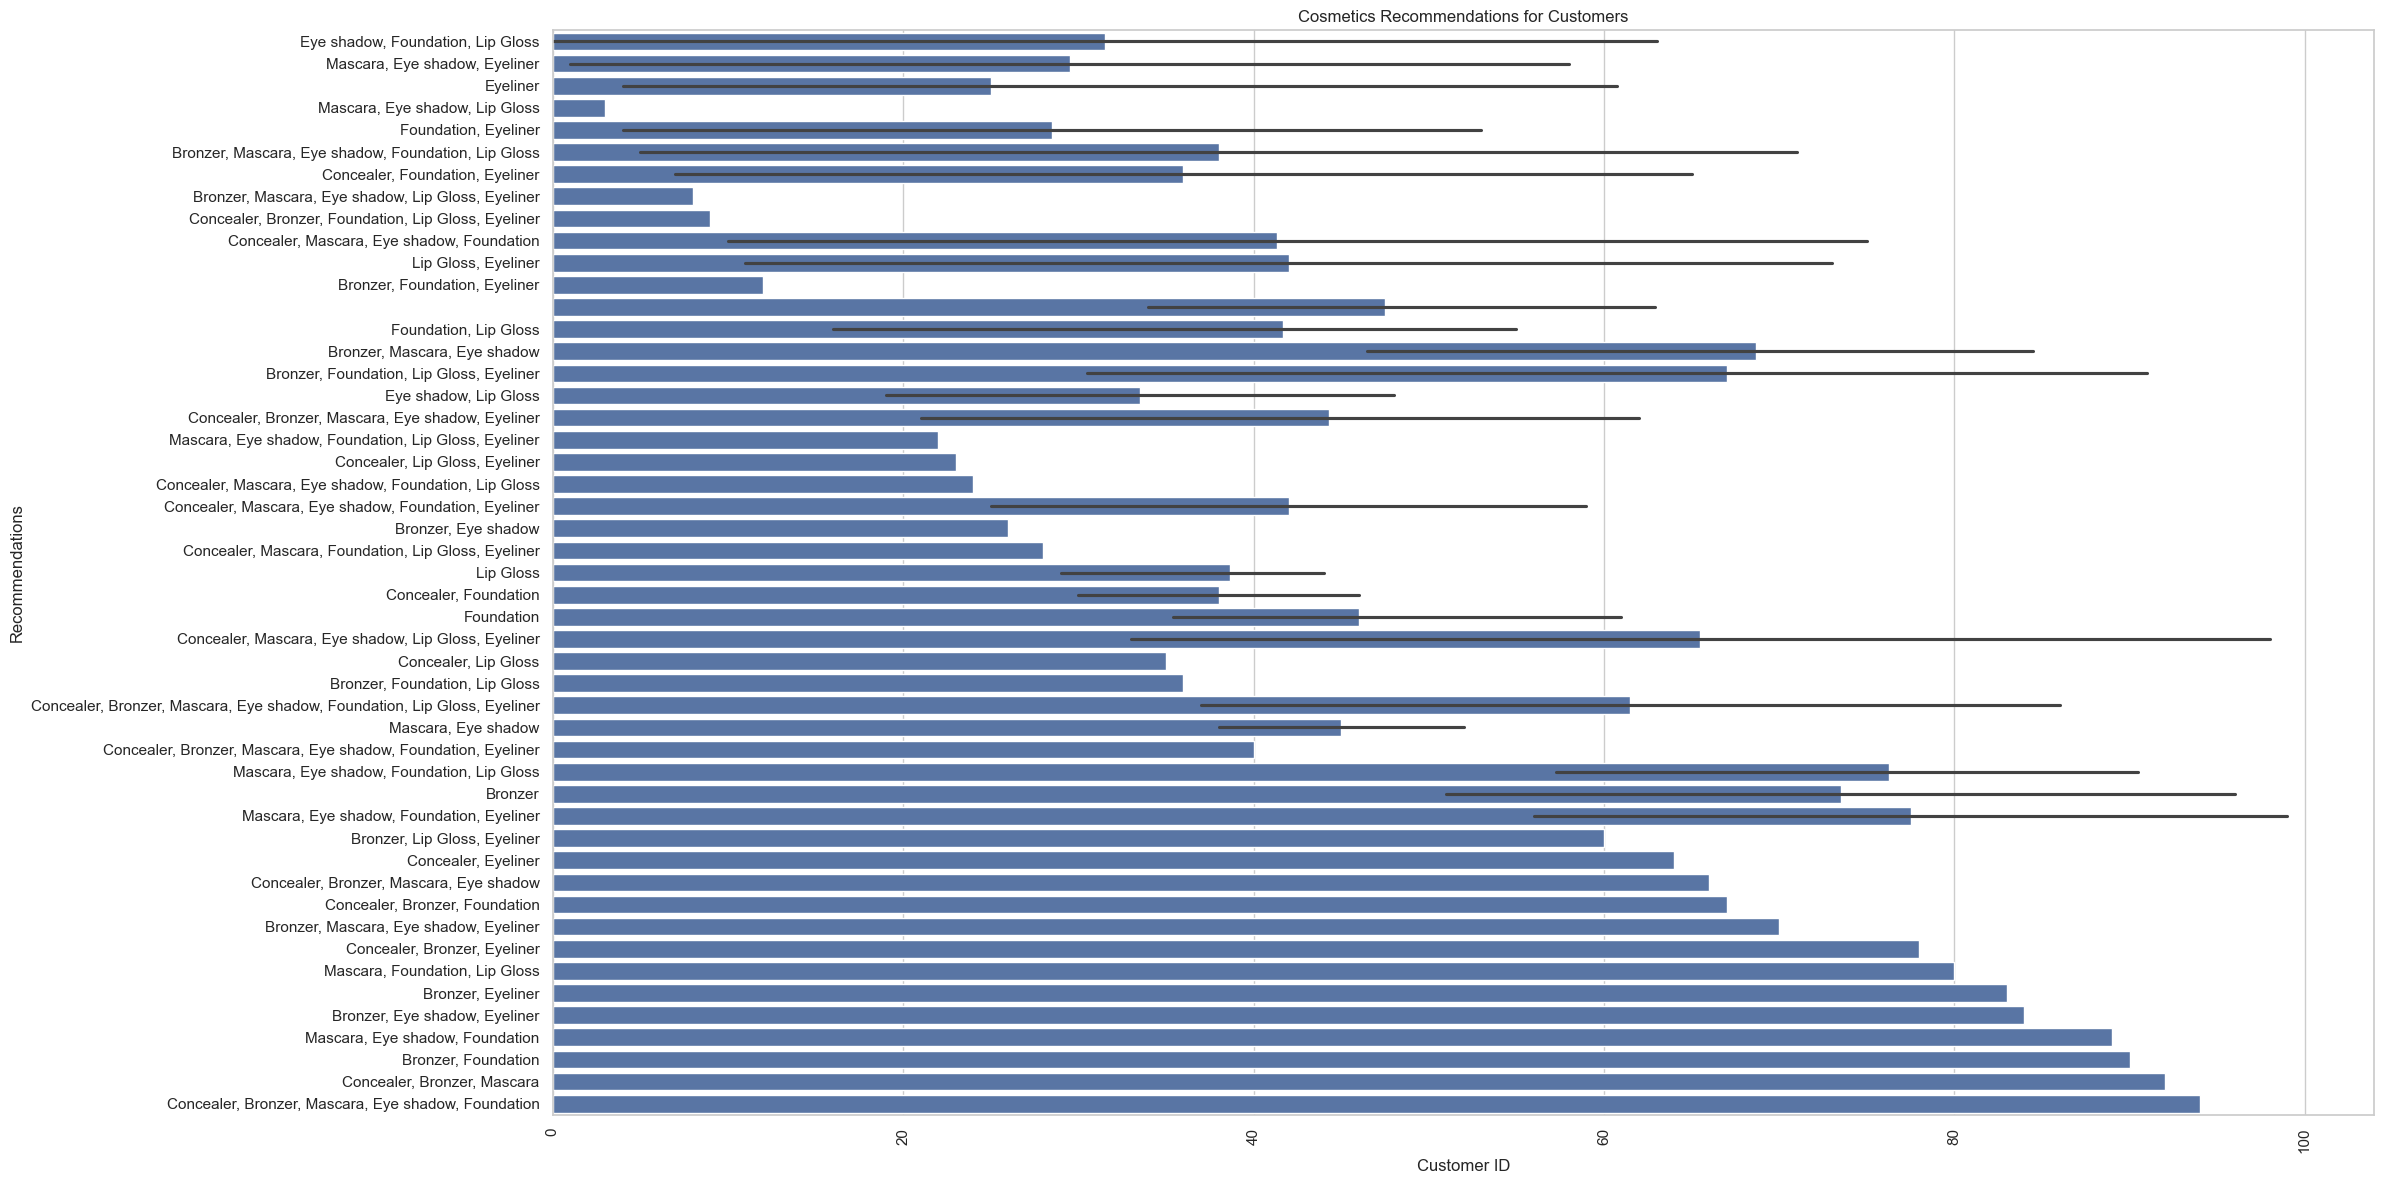

In [23]:
# Plot the recommendations in a bar chart
sns.set(style="whitegrid")
plt.figure(figsize=(24, 12))
sns.barplot(data=data, x=data.index, y='Recommendation')
plt.xticks(rotation=90)
plt.xlabel('Customer ID')
plt.ylabel('Recommendations')
plt.title('Cosmetics Recommendations for Customers')
plt.tight_layout()
plt.show()

#So it shows all the recomendation for the customers.
we can adjust the thrash to narrow the recommendations
On increasing the thrashhold the recommendation decreases and vica versa. 

The value of the thrshhold varies from 0 to 0.5 as on 0.5 it will not recommend anything and on 0.01 it will recommend everything.

# <center> <font color= green> Here 



###Step 1: Data Preprocessing and Loading  

###Step 2: Define the "Purchasing Needs and Taste" Distance (pnt-D)
Distance (pnt-D) = 1 - (Number of common bought products / Number of unique bought products)
This heuristic captures the idea that customers who have bought similar products have closer purchasing needs and taste.

###Step 3: Calculate the similarity between products for Each  Customers
We are calculating a cosine similarity matrix 

###Step 4: Heuristic Reasoning and Getting recommendations for a given customer
Based on the calculated pnt-D values and similarities we calclute total weighted ratings, by which we can apply heuristic reasoning to make predictions for each customer on what they haven't bought yet but may want to buy next.


###Step 5: Evaluate and Refine the Recommendation System
Based on the total weighted scores we are recommeding the products to the customres for thier next purchase.



---



---





---



---



#<center> 4. Reflection 
##• Reflect on any challenges or surprises encountered during the assignment.
##• Discuss potential improvements or extensions to the activities in your own words.

#<center> <font color =green> Challenges or Surprises:



* ## Data Preprocessing 
One challenge is that the dataset does not have a customer identifier, which makes it difficult to track individual customers. It would be helpful to have unique customer IDs associated with their purchases.


* ## Threshold Value
The code sets a threshold value of 0.5 to determine whether a recommendation is made or not. This threshold may not be optimal and could be subjective. 



---




#<center> <font color =green> Potential Improvements or Extensions:





* ## Enhanced Customer Profiling
To improve the recommendations, it would be beneficial to gather additional information about customers, such as demographics, preferences, or purchase history. This data could be incorporated into the recommendation algorithm to personalize the recommendations further.

* ## Advanced Recommendation Algorithms 
The current code uses a simple heuristic-based approach. Consider implementing more sophisticated recommendation algorithms, such as collaborative filtering (user-based or item-based), matrix factorization, or deep learning-based models like neural networks.

* ## Evaluation Metrics
Introduce evaluation metrics to measure the effectiveness of the recommendation system, such as precision, recall, or mean average precision. This will help assess the performance and iterate on the recommendation algorithms to improve their accuracy.

* ## Scalability and Efficiency
Consider the scalability and efficiency of the recommendation system, especially when dealing with large datasets and a large number of customers. 